<a href="https://colab.research.google.com/github/TashfiaChowdhury/CNN-Project/blob/main/84_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cat Data
['C106.jpg', 'C130.jpg', 'C12.jpg', 'C10.jpg', 'C1.jpg', 'C105.jpg', 'C123.jpg', 'C116.jpg', 'C109.jpg', 'C100.jpg', 'C113.webp', 'C129.jpg', 'C115.webp', 'C120.jpg', 'C131.png', 'C108.jpg', 'C13.jpg', 'C119.jpg', 'C11.jpg', 'C118.jpg', 'C124.jpg', 'C104.jpg', 'C127.jpg', 'C110.jpg', 'C112.jpg', 'C107.jpg', 'C114.webp', 'C117.webp', 'C102.jpg', 'C126.jpg', 'C128.webp', 'C132.jpg', 'C122.jpg', 'C111.webp', 'C103.jpg', 'C101.jpg', 'C121.webp', 'C125.jpg', 'C22.jpg', 'C2.jpg', 'C50.jpg', 'C133.jpg', 'C139.jpg', 'C53.webp', 'C135.webp', 'C54.webp', 'C36.jpg', 'C46.jpg', 'C25.jpg', 'C45.webp', 'C35.jpg', 'C52.webp', 'C48.jpg', 'C15.jpg', 'C138.jpg', 'C41.jpg', 'C14.jpg', 'C30.jpg', 'C137.jpg', 'C31.jpg', 'C49.jpg', 'C37.jpg', 'C24.webp', 'C136.png', 'C56.webp', 'C3.jpg', 'C19.jpg', 'C59.webp', 'C39.jpg', 'C27.jpg', 'C28.jpg', 'C51.jpg', 'C23.jpg', 'C21.jp

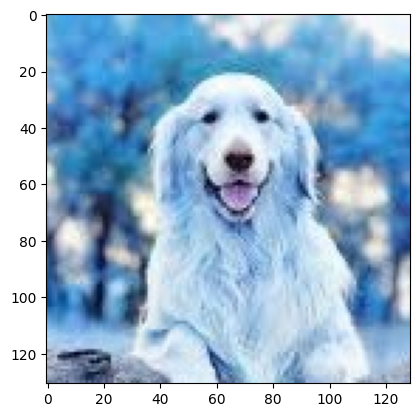

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

from google.colab import drive
drive.mount('/content/drive')

file_cat=os.listdir("/content/drive/MyDrive/dataset/Cats")
print('cat Data')
print(file_cat)
file_dog=os.listdir("/content/drive/MyDrive/dataset/dog")
print('Dog Data')
print(file_dog)

file_lamb=os.listdir("/content/drive/MyDrive/dataset/Lambs")
print('Lamb Data')
print(file_lamb)

file_cow=os.listdir("/content/drive/MyDrive/dataset/cow")
print('cow Data')
print(file_cow)

file_zebra=os.listdir("/content/drive/MyDrive/dataset/zebra")
print('cow Data')
print(file_zebra)



for image in file_cat:
    img=os.path.join("/content/drive/MyDrive/dataset/Cats",image)
    print(img)
    break

for image in file_cat:
    img=os.path.join("/content/drive/MyDrive/dataset/Cats",image)
    img_a=cv2.imread(img)
    plt.imshow(img_a)
    break

for image in file_dog:
    img=os.path.join("/content/drive/MyDrive/dataset/dog",image)
    img_a=cv2.imread(img)
    plt.imshow(img_a)
    break



value_train=[]
for image in file_cat:
    img=os.path.join("/content/drive/MyDrive/dataset/Cats",image)

    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,0])

for image in file_dog:
    img=os.path.join("/content/drive/MyDrive/dataset/dog",image)

    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,1])

for image in file_lamb:
    img=os.path.join("/content/drive/MyDrive/dataset/Lambs",image)

    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,2])

for image in file_cow:
    img=os.path.join("/content/drive/MyDrive/dataset/cow",image)

    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,3])

for image in file_zebra:
    img=os.path.join("/content/drive/MyDrive/dataset/zebra",image)

    pic=load_img(img,target_size=(100,100))
    pic=img_to_array(pic)
    pics=preprocess_input(pic)
    value_train.append([pics,4])

random.shuffle(value_train)

X=[]
Y=[]
for i in range(len(value_train)):
  X.append(value_train[i][0])
  Y.append(value_train[i][1])

X=np.array(X,dtype="float32")
Y=np.array(Y)

model = Sequential()

model.add(Conv2D(64,(3,3),activation ='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D( 32,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(16,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(8,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(5, activation = "softmax"))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

model.summary()

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.08)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.20)


model_train = model.fit(X_train, Y_train,epochs =40, validation_data = (X_val, Y_val))

Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

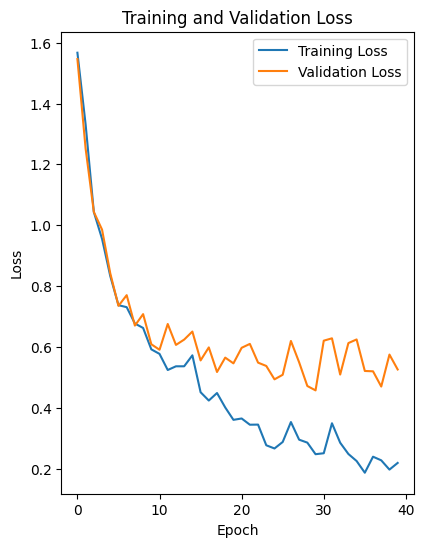

In [ ]:
# Plot training and validation loss/accuracy
plt.figure(figsize=(10, 6))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(model_train.history['loss'], label='Training Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

2/2 [==============================] - 0s 142ms/step
Confusion Matrix:
[[ 6  1  1  0  0]
 [ 3  4  0  0  0]
 [ 0  0 17  1  0]
 [ 0  1  2 11  0]
 [ 0  0  0  0 10]]


Text(0.5, 1.0, 'Confusion Matrix')

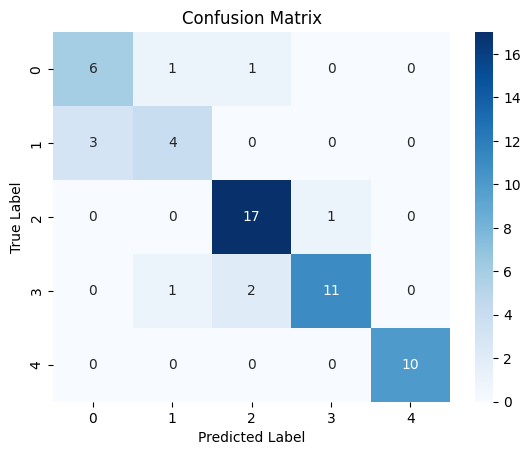

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')  # Adjust 'Blues' for different colormaps

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot (uncomment if desired)
# plt.show()

In [ ]:
img = load_img('/content/drive/MyDrive/Test_Pic.jpg', target_size=(100, 100))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_labels = {0: 'Cat', 1: 'Dog', 2: 'Lamb', 3: 'Cow', 4: 'Horse'}

print(f"The image is predicted to be a {class_labels[predicted_class]}.")

1/1 [==============================] - 0s 39ms/step
The image is predicted to be a Cat.


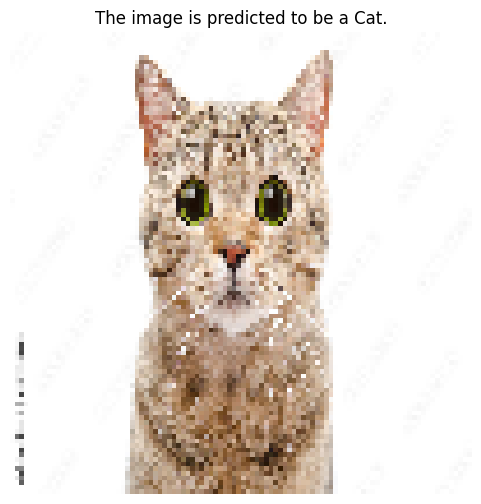

In [ ]:
import matplotlib.pyplot as plt
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"The image is predicted to be a {class_labels[predicted_class]}.")
plt.show()


1/1 [==============================] - 0s 90ms/step


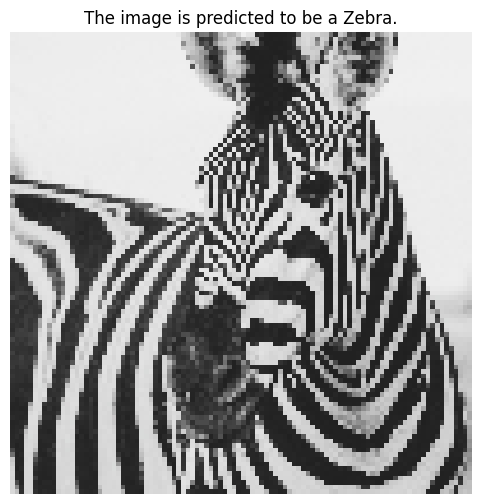

In [ ]:
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/Test_Pic2.jpg', target_size=(100, 100))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_labels = {0: 'Cat', 1: 'Dog', 2: 'Lamb', 3: 'Cow', 4: 'Zebra'}

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"The image is predicted to be a {class_labels[predicted_class]}.")
plt.show()

1/1 [==============================] - 0s 104ms/step


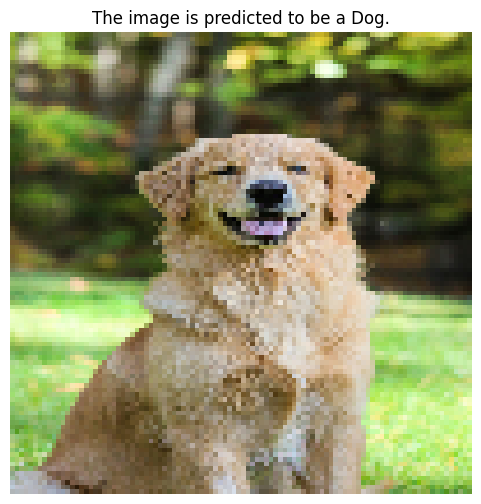

In [ ]:
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/Test_Pic3.jpg', target_size=(100, 100))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_labels = {0: 'Cat', 1: 'Dog', 2: 'Lamb', 3: 'Cow', 4: 'Zebra'}

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"The image is predicted to be a {class_labels[predicted_class]}.")
plt.show()

1/1 [==============================] - 0s 102ms/step


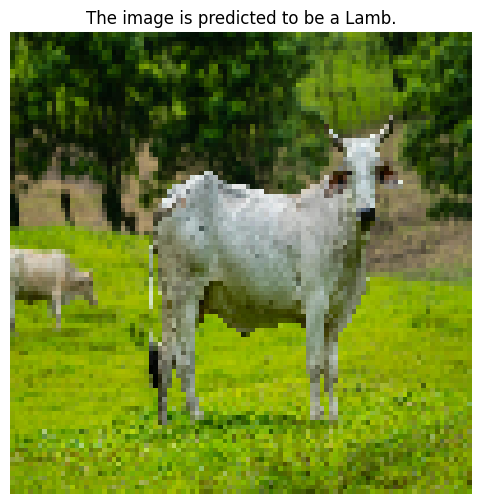

In [ ]:
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/Test_Pic4.jpg', target_size=(100, 100))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_labels = {0: 'Cat', 1: 'Dog', 2: 'Lamb', 3: 'Cow', 4: 'Zebra'}

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"The image is predicted to be a {class_labels[predicted_class]}.")
plt.show()

1/1 [==============================] - 0s 40ms/step


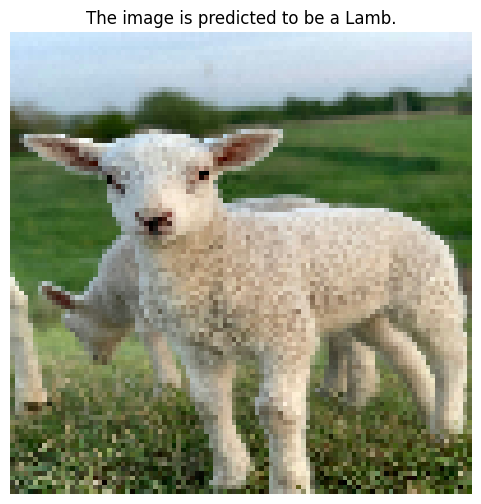

In [ ]:
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/Test_Pic5.jpg', target_size=(100, 100))
img_array = img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_labels = {0: 'Cat', 1: 'Dog', 2: 'Lamb', 3: 'Cow', 4: 'Zebra'}

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"The image is predicted to be a {class_labels[predicted_class]}.")
plt.show()